## finding melting temperature

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of head

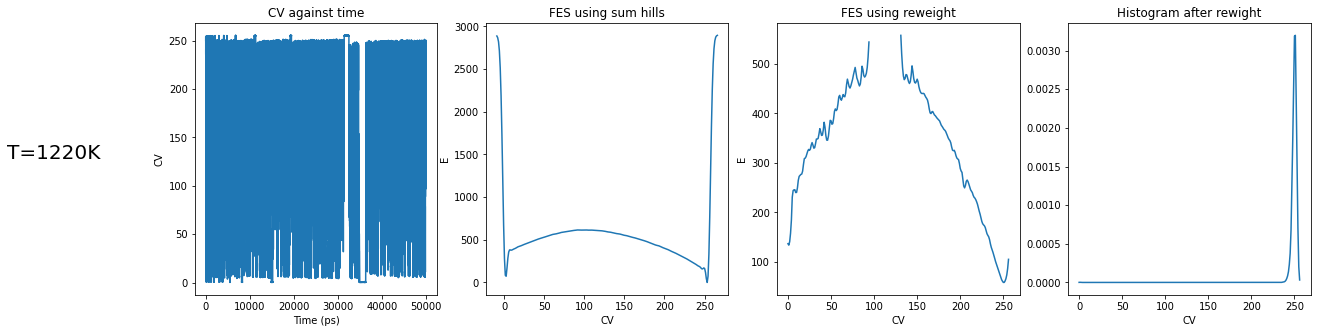

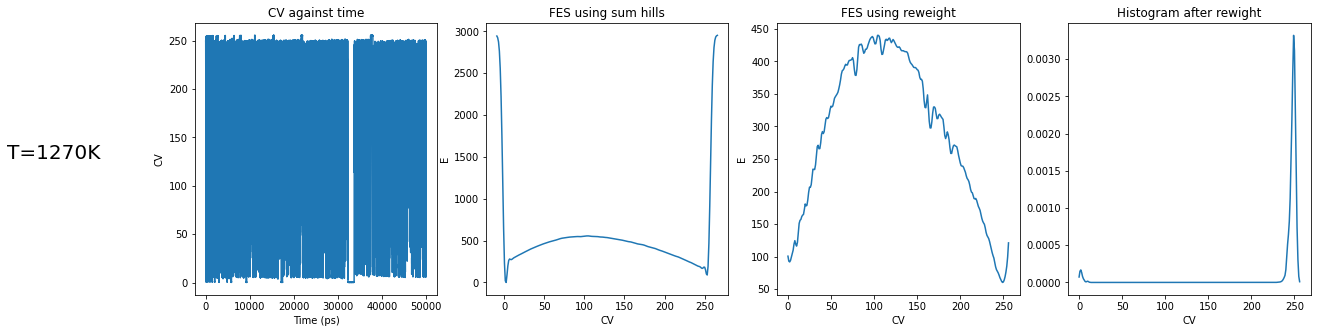

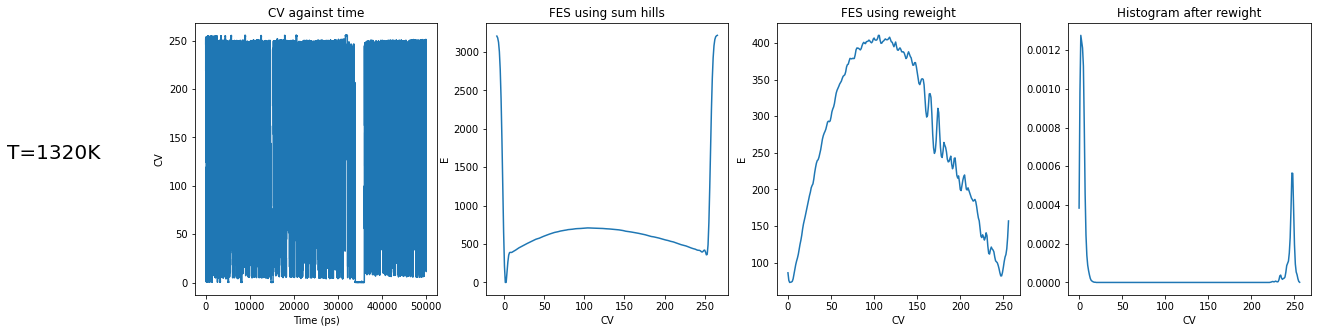

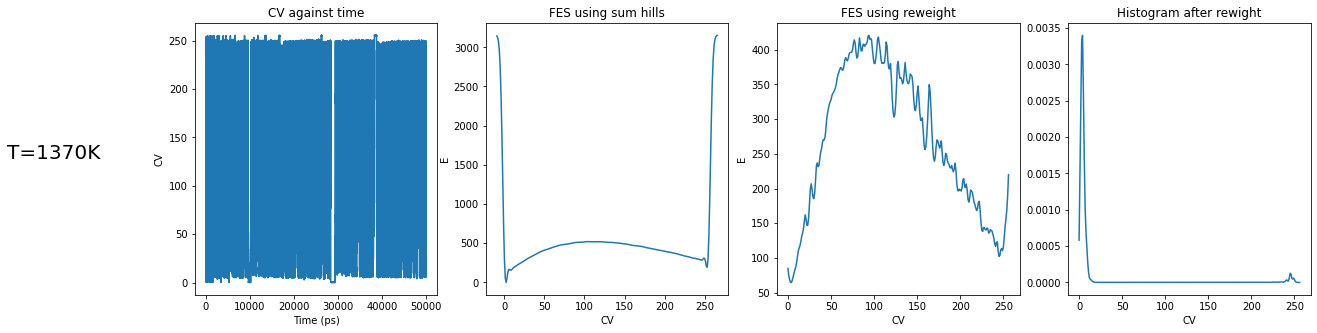

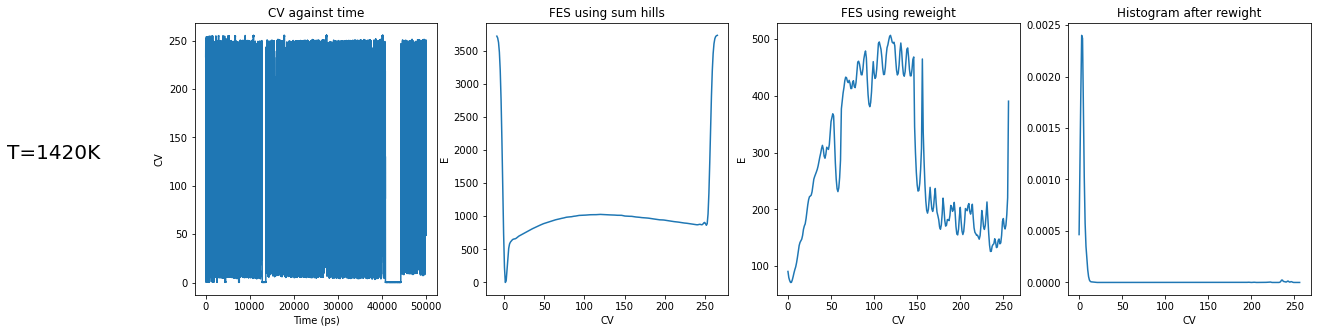

In [67]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

temps = [1220,1270,1320,1370,1420]
seed = "_2"
for temp in temps:
    fig, axs = plt.subplots(1,4,figsize=(20,5))
    data= pandas.read_csv(f"FindMTlikeSiliconExample/COLVAR{temp}{seed}", delimiter=r"\s+",skiprows=1,names=["time","mean","morethan",1,2],index_col=False)
    axs[0].plot(data.time,data["morethan"])
    data = pandas.read_csv(f"FindMTlikeSiliconExample/fes_{temp}{seed}.dat", delimiter=r"\s+", skiprows=6, names=["morethan", "freeEnergy", "der"]).astype(float)
    axs[0].set_title("CV against time")
    axs[0].set_xlabel("Time (ps)")
    axs[0].set_ylabel("CV")
    axs[1].plot(data["morethan"],data["freeEnergy"])
    data = pandas.read_csv(f"FindMTlikeSiliconExample/ff{temp}{seed}.dat", delimiter=r"\s+", skiprows=6, names=["morethan", "freeEnergy", "der"]).astype(float)
    axs[1].set_title("FES using sum hills")
    axs[1].set_xlabel("CV")
    axs[1].set_ylabel("E")
    axs[2].plot(data["morethan"],data["freeEnergy"])
    data = pandas.read_csv(f"FindMTlikeSiliconExample/hh{temp}{seed}.dat", delimiter=r"\s+", skiprows=6, names=["morethan", "density", "der"]).astype(float)
    axs[2].set_title("FES using reweight")
    axs[2].set_xlabel("CV")
    axs[2].set_ylabel("E")
    axs[3].plot(data["morethan"],data["density"])
    axs[3].set_title("Histogram after rewight")
    axs[3].set_xlabel("CV")
    axs[0].text(-45000, 128, f"T={temp}K", fontsize=20)

Text(0, 0.5, 'E (J)')

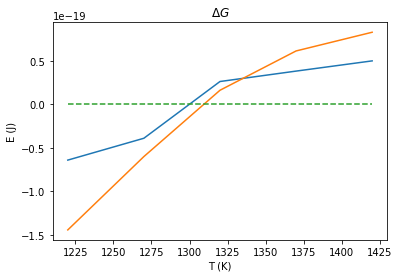

In [68]:
dglist = [] 
for seed in ["","_2"]:
    dgs = []
    for temp in temps:
        data = pandas.read_csv(f"FindMTlikeSiliconExample/hh{temp}{seed}.dat", delimiter=r"\s+", skiprows=6, names=["morethan", "density", "der"]).astype(float)
        pliquid = np.trapz(data.loc[data.morethan<128].density)
        psolid = np.trapz(data.loc[data.morethan>128].density)
        dgs.append(-temp*1.380649e-23*np.log(psolid/pliquid))
    dglist.append(dgs)
fig, ax = plt.subplots()
for dg in dglist:
    ax.plot(temps,dg)
ax.plot([min(temps),max(temps)],[0,0],linestyle="dashed")
ax.set_title(r"$\Delta G$")
ax.set_xlabel("T (K)")
ax.set_ylabel("E (J)")

## Run with solvent

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


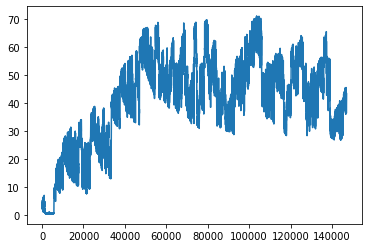

In [9]:
data= pandas.read_csv("longRuns/octadecene/wellTempered/colv", delimiter=r"\s+",skiprows=1,names=["time","mean","morethan",1,2,3],index_col=False)
plt.plot(data.time,data["morethan"])

/tmp/ipykernel_1564679/2392101380.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  r2 = plm.read_as_pandas("longRuns/octadecene/wellTempered/colv")
/tmp/ipykernel_1564679/2392101380.py:13: RuntimeWarning: divide by zero encountered in log
  F = -kt*np.log(histc/max(histc))


Text(0.5, 1.0, 'sum hills')

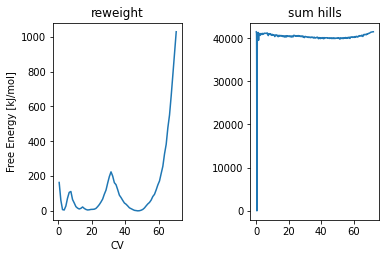

In [17]:
fig,axs = plt.subplots(1,2)

import plumed as plm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
kt=4.3 #@520 K
r2 = plm.read_as_pandas("longRuns/octadecene/wellTempered/colv")

histc, histb = np.histogram(r2["d.morethan"],bins=100,range=(0,100),weights=np.exp(r2["restraint.rbias"]/kt))

s = 0.5*(histb[1:]+histb[:-1])
F = -kt*np.log(histc/max(histc))

axs[0].plot(s,F)

axs[0].set_xlabel("CV")
axs[0].set_ylabel("Free Energy [kJ/mol]")
data = pandas.read_csv(f"longRuns/octadecene/wellTempered/fes_1.dat", delimiter=r"\s+", skiprows=6, names=["morethan", "freeEnergy", "der"]).astype(float)
axs[1].plot(data["morethan"],data["freeEnergy"])
fig.tight_layout(pad=3.0)
axs[0].set_title(f"reweight")
axs[1].set_title(f"sum hills")